In [3]:
import mysql.connector
def mydbconnect():
     mydb = mysql.connector.connect (
     host="localhost",
     user="root",
     password="root",
     database="ecomdb1"
      )
     return mydb

In [7]:
mydb=mydbconnect()
mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM department")

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

mydb.close()


(101, 'Admin', 'Kolkata')
(102, 'Finance', 'Delhi')
(103, 'Production', 'Hyderabad')
(104, 'Sale', 'Pune')
(105, 'Purchase', 'Kolkata')
(106, 'Welfare', None)
(107, 'CustCare', None)
(108, 'Utilization', 'Delhi')
(109, 'HR', 'Hyderabad')
(1010, 'Education', 'Kolkata')
(1011, 'IT', 'Delhi')
(1012, 'Service', 'Kolkata')


In [11]:
mydb=mydbconnect()
mycursor = mydb.cursor()
sqlstmt="select e.emp_id,e.emp_name,e.salary,d.dept_name,d.location from employee e join department d on e.dept_id=d.dept_id" 

mycursor.execute(sqlstmt)
myresult = mycursor.fetchall()

for x in myresult:
  print(x)
mydb.close()

('E1001', 'Rina', Decimal('50000.00'), 'Admin', 'Kolkata')
('E1002', 'Tina', Decimal('30000.00'), 'Admin', 'Kolkata')
('E1003', 'Jina', Decimal('15000.00'), 'Admin', 'Kolkata')
('E1004', 'Lina', Decimal('33000.00'), 'Admin', 'Kolkata')
('E1005', 'Mina', Decimal('25000.00'), 'Admin', 'Kolkata')
('E1006', 'Dina', Decimal('32000.00'), 'Admin', 'Kolkata')
('E1007', 'Liz', Decimal('25000.00'), 'Finance', 'Delhi')
('E1008', 'Ann', Decimal('35000.00'), 'Finance', 'Delhi')
('E1009', 'Julie', Decimal('65000.00'), 'Finance', 'Delhi')
('E1010', 'Mary', Decimal('35000.00'), 'Finance', 'Delhi')
('E1011', 'Rita', Decimal('45000.00'), 'Production', 'Hyderabad')
('E1012', 'Nita', Decimal('20000.00'), 'Production', 'Hyderabad')
('E1013', 'Gita', Decimal('75000.00'), 'Production', 'Hyderabad')
('E1014', 'Riya', Decimal('12000.00'), 'Purchase', 'Kolkata')
('E1015', 'Diya', Decimal('55000.00'), 'Purchase', 'Kolkata')


In [16]:
id=int(input("Enter Department Id:"))
name=input("Enter Department Name:")
loc=input("Enter Department Location:")
mydb=mydbconnect()
mycursor = mydb.cursor()
sqlstmt="insert into department values(%s,%s,%s)"
vals=(id,name,loc)
mycursor.execute(sqlstmt,vals)
mydb.commit()
print('new record inserted')
mydb.close()

Enter Department Id: 1015
Enter Department Name: Welfare
Enter Department Location: Mumbai


new record inserted


In [1]:
mysql> use StudentManagementSystem;
Database changed
mysql> CREATE TABLE  Student (
    ->     StudentID INT NOT NULL PRIMARY KEY,
    ->     FirstName VARCHAR(50) NOT NULL,
    ->     LastName VARCHAR(50) NOT NULL,
    ->     DateOfBirth DATE NOT NULL,
    ->     Gender VARCHAR(10) NOT NULL,
    ->     Email VARCHAR(100) NOT NULL,
    ->     Phone VARCHAR(20) NOT NULL
    -> );
Query OK, 0 rows affected (0.02 sec)

mysql> desc Student;
+-------------+--------------+------+-----+---------+-------+
| Field       | Type         | Null | Key | Default | Extra |
+-------------+--------------+------+-----+---------+-------+
| StudentID   | int          | NO   | PRI | NULL    |       |
| FirstName   | varchar(50)  | NO   |     | NULL    |       |
| LastName    | varchar(50)  | NO   |     | NULL    |       |
| DateOfBirth | date         | NO   |     | NULL    |       |
| Gender      | varchar(10)  | NO   |     | NULL    |       |
| Email       | varchar(100) | NO   |     | NULL    |       |
| Phone       | varchar(20)  | NO   |     | NULL    |       |
+-------------+--------------+------+-----+---------+-------+
7 rows in set (0.00 sec)


SyntaxError: invalid syntax (1746649854.py, line 1)

C:\Users\suram\AppData\Local\Temp\ipykernel_22988\1566931620.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sql_query = pd.read_sql_query(sqlstmt,mydb)


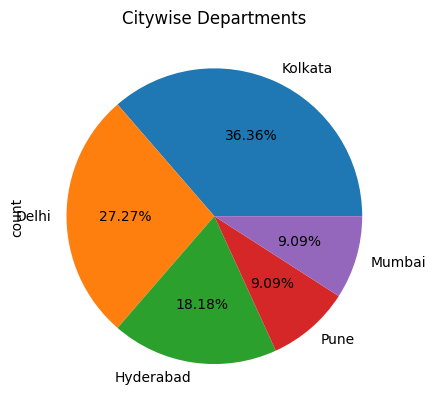

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mydb=mydbconnect()
sqlstmt="select location from department where location is not null" 
sql_query = pd.read_sql_query(sqlstmt,mydb)
'''mycursor = mydb.cursor()
mycursor.execute(sqlstmt)
myresult = mycursor.fetchall()

for x in myresult:
  print(x)'''
df = pd.DataFrame(sql_query, columns = ['location'])
#print(df)
df.dropna(inplace=True)
df['location'].value_counts().plot(kind='pie',autopct='%1.2f%%',);
  #colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightgrey']
   # plt.pie(monthly_income, labels=income_sources, colors=colors, autopct='%1.1f%%')
plt.title('Citywise Departments')
plt.show()

mydb.close()
